## Importing the relevant libraries

In [12]:
!pip install wget

In [2]:
# !pip install tensorflow==2.9.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.7 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 88.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 85.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 37.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attemp

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import wget, gc
wget.download("https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py",out="helper_prabowo_ml.py")
from helper_prabowo_ml import clean_html, remove_links, remove_special_characters, removeStopWords, remove_, remove_digits, lower, email_address, non_ascii, punct, hashtags
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Dropout, Flatten
import tensorflow as tf
from keras.models import Model
from keras.utils import plot_model, to_categorical
from keras.optimizers import Adam
from keras.metrics import SparseCategoricalAccuracy
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# api.competition_download_file('sentiment-analysis-on-movie-reviews','train.tsv.zip',path='./')
# api.competition_download_file('sentiment-analysis-on-movie-reviews','test.tsv.zip',path='./')

In [ ]:
# with zipfile.ZipFile('train.tsv.zip','r') as zipref:
#     zipref.extractall('./')

In [ ]:
# with zipfile.ZipFile('test.tsv.zip','r') as zipref:
#     zipref.extractall('./')

## Loading the dataset

In [14]:
df = pd.read_csv('/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv',encoding='latin',header=None)
df.columns = ['sentiment','text']
df.head()

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


## Data Exploration

In [15]:
df.shape

(4846, 2)

In [16]:
df.isna().sum()

sentiment    0
text         0
dtype: int64

In [17]:
df.duplicated().sum()

6

In [18]:
df = df.drop_duplicates()
df.shape

(4840, 2)

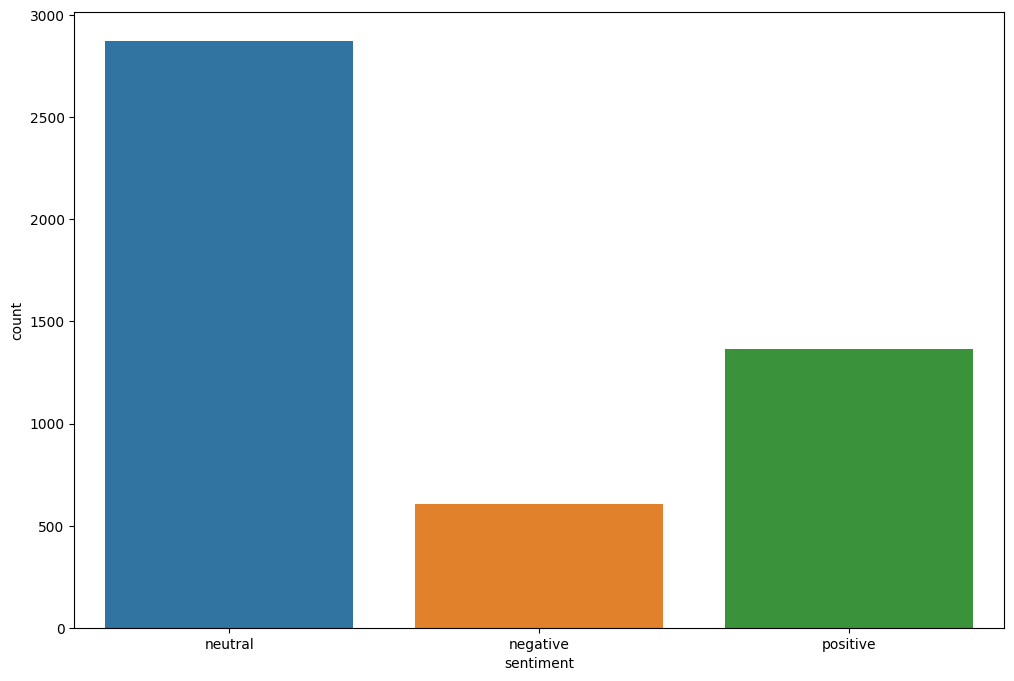

2928

In [19]:
plt.figure(figsize=(12,8))
fig = sns.countplot(x='sentiment',data=df)
plt.show(fig)
plt.close('all')
del fig
gc.collect()

In [ ]:
plt.figure(figsize=(12, 8))

# Generate the word cloud using the text data
text_data = ' '.join(df['text'])
wc = WordCloud(
    width=800,          # Increased width for better resolution
    height=400,         # Increased height for better resolution
    max_words=200,      # Limit the number of words
    background_color='white',  # Set a white background for contrast
    colormap='viridis', # Using 'viridis' colormap for more vibrant colors
    random_state=42     # Seed for reproducibility
).generate(text_data)

# Plot the WordCloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Hide axes

# Add a title with enhanced aesthetics
plt.title('Word Cloud of Financial News', fontsize=24, fontweight='bold', color='darkcyan', pad=20)

# Display the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


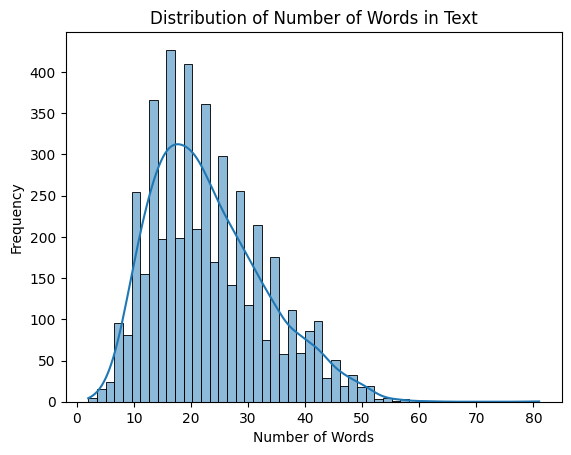

In [23]:
# Calculating the number of words in each text entry
df['num_words'] = df['text'].apply(lambda x: len(x.split()))

# Plotting the distribution of the number of words
sns.histplot(df['num_words'], kde=True)

# Adding labels and title for better visualization
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Words in Text")
plt.show()

In [28]:
df.num_words.describe()

count    4840.000000
mean       23.092975
std         9.940827
min         2.000000
25%        16.000000
50%        21.000000
75%        29.000000
max        81.000000
Name: num_words, dtype: float64

In [29]:
max_len = 65

## Text Preprocessing

In [30]:
def clean_text(data,col):
    data[col] = data[col].apply(clean_html)
    data[col] = data[col].apply(remove_)
    data[col] = data[col].apply(remove_digits)
    data[col] = data[col].apply(remove_links)
    data[col] = data[col].apply(remove_special_characters)
    data[col] = data[col].apply(removeStopWords)
    data[col] = data[col].apply(punct)
    data[col] = data[col].apply(email_address)
    data[col] = data[col].apply(non_ascii)
    data[col] = data[col].apply(lower)
    return data

In [31]:
preprocessed_df = clean_text(df,'text')
preprocessed_df.head()

,sentiment,text,num_words
0,neutral,according gran company plans move production r...,25
1,neutral,technopolis plans develop stages area less squ...,31
2,negative,the international electronic industry company ...,36
3,positive,with new production plant company would increa...,33
4,positive,according company s updated strategy years bas...,41


## Encoding the target sentiment column

In [32]:
encoder = LabelEncoder()
preprocessed_df['sentiment'] = encoder.fit_transform(preprocessed_df['sentiment'])

## Splitting the dataset into train and test sets

In [33]:
train_df, validation_df = train_test_split(preprocessed_df,test_size=0.2,random_state=101,shuffle=True,stratify=preprocessed_df.sentiment)

## Downloading the pretrained Tokenizer class and the pretrained DistilBERT transformer model

In [34]:
model_name = "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis"

tokenizer = AutoTokenizer.from_pretrained(model_name)
bert = TFAutoModelForSequenceClassification.from_pretrained(model_name,num_labels=3,from_pt=True)

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/933 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a

## Performing text tokenization

In [35]:
X_train = tokenizer(text=train_df.text.tolist(),
                   max_length=max_len,
                   padding=True,
                   truncation=True,
                   add_special_tokens=True,
                   return_attention_mask=True,
                   return_token_type_ids=False,
                   return_tensors='tf')

X_val = tokenizer(text=validation_df.text.tolist(),
                 max_length=max_len,
                 padding=True,
                 truncation=True,
                 add_special_tokens=True,
                 return_attention_mask=True,
                 return_token_type_ids=False,
                 return_tensors='tf')

## Fine-tuning the DistilBERT-base-uncased model architecture

In [36]:
input_ids = Input(shape=(max_len,),dtype=tf.int32,name='input_ids')
attention_mask = Input(shape=(max_len,),dtype=tf.int32,name='attention_mask')

In [37]:
embeddings = bert(input_ids,attention_mask=attention_mask)[0] # 0 -> final hidden state, 1 -> pooling output
output = Flatten()(embeddings)
output = Dense(units=256,activation='relu')(output)
output = Dropout(0.3)(output)
output = Dense(units=128,activation='relu')(output)
output = Dropout(0.2)(output)
output = Dense(units=64,activation='relu')(output)
output = Dropout(0.1)(output)
output = Dense(units=32,activation='relu')(output)
output = Dense(units=3,activation='softmax')(output)

model = Model(inputs=[input_ids,attention_mask],outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 65)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 65)]         0           []                               
                                                                                                  
 tf_roberta_for_sequence_classi  TFSequenceClassifie  82120707   ['input_ids[0][0]',              
 fication (TFRobertaForSequence  rOutput(loss=None,               'attention_mask[0][0]']         
 Classification)                logits=(None, 3),                                                 
                                 hidden_states=None                                           

In [ ]:
plot_model(model,'model.png',show_shapes=True,dpi=100)

In [39]:
optimizer = Adam(learning_rate=2e-4,epsilon=2e-8,clipnorm=1.0,decay=1e-2)

model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=SparseCategoricalAccuracy('balanced_accuracy'))

In [40]:
def time_based_decay(epoch, lr):
    decay_rate = 0.1
    decay_step = 20
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

es = EarlyStopping(monitor='val_balanced_accuracy',patience=20,verbose=1,mode='max')
mc = ModelCheckpoint(filepath='financial_news_sentiment_predictor.h5',monitor='val_balanced_accuracy',mode='max',save_best_only=True,verbose=1)
lrs = LearningRateScheduler(time_based_decay)

r = model.fit(x={'input_ids': X_train['input_ids'], 'attention_mask': X_train['attention_mask']},
              y=train_df.sentiment,
              epochs=70,
              batch_size=32,
              validation_data=({'input_ids': X_val['input_ids'], 'attention_mask': X_val['attention_mask']},validation_df.sentiment),
              callbacks=[es,mc,lrs]
             )

Epoch 1/70
121/121 [==============================] - ETA: 0s - loss: 0.9096 - balanced_accuracy: 0.6023
Epoch 1: val_balanced_accuracy improved from -inf to 0.69628, saving model to financial_news_sentiment_predictor.h5
121/121 [==============================] - 459s 4s/step - loss: 0.9096 - balanced_accuracy: 0.6023 - val_loss: 0.7987 - val_balanced_accuracy: 0.6963 - lr: 2.0000e-04
Epoch 2/70
121/121 [==============================] - ETA: 0s - loss: 0.7993 - balanced_accuracy: 0.6919
Epoch 2: val_balanced_accuracy improved from 0.69628 to 0.72211, saving model to financial_news_sentiment_predictor.h5
121/121 [==============================] - 450s 4s/step - loss: 0.7993 - balanced_accuracy: 0.6919 - val_loss: 0.7271 - val_balanced_accuracy: 0.7221 - lr: 2.0000e-04
Epoch 3/70
121/121 [==============================] - ETA: 0s - loss: 0.7083 - balanced_accuracy: 0.7231
Epoch 3: val_balanced_accuracy improved from 0.72211 to 0.73967, saving model to financial_news_sentiment_predictor.

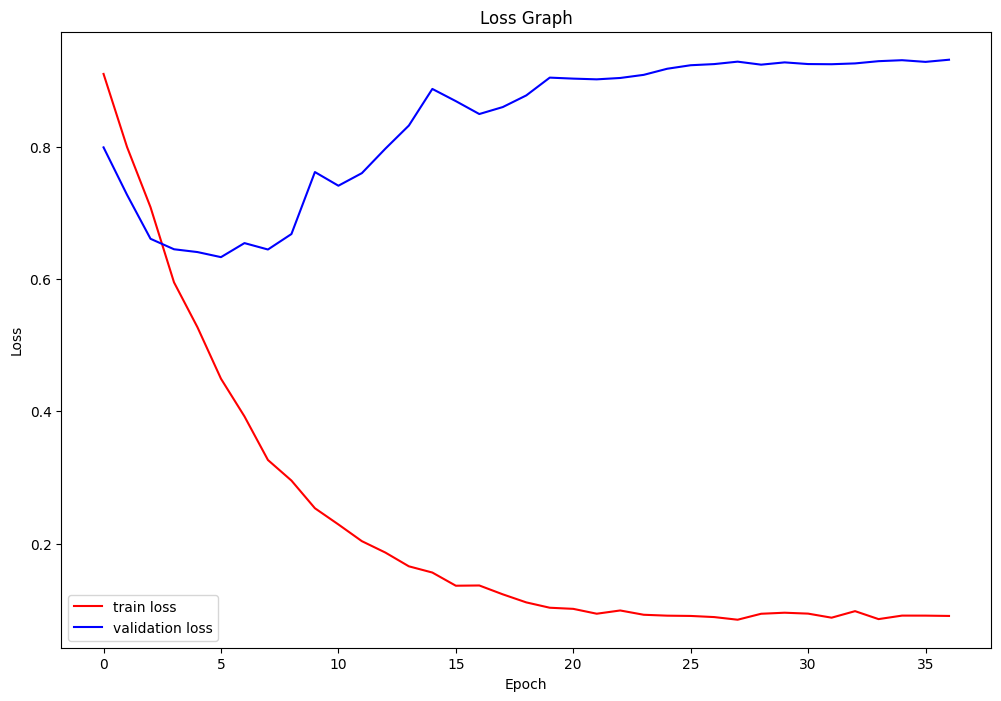

In [41]:
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();

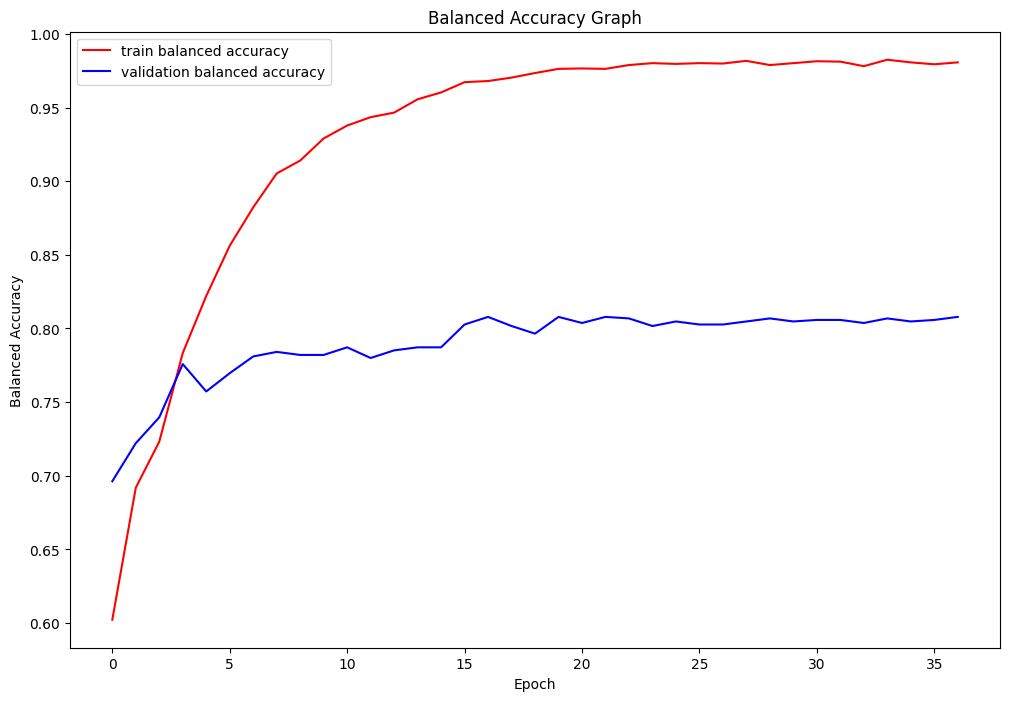

In [42]:
plt.figure(figsize=(12,8))
plt.plot(r.history['balanced_accuracy'],'r',label='train balanced accuracy')
plt.plot(r.history['val_balanced_accuracy'],'b',label='validation balanced accuracy')
plt.xlabel('Epoch')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy Graph')
plt.legend();

In [43]:
loss, acc = model.evaluate({'input_ids': X_val['input_ids'], 'attention_mask': X_val['attention_mask']},validation_df.sentiment)
print("Sparse Categorical Crossentropy Loss:", round(loss,2))
print("Sparse Categorical Accuracy (Balanced): ", round(acc*100,2),'%')

31/31 [==============================] - 28s 895ms/step - loss: 0.9311 - balanced_accuracy: 0.8079
Sparse Categorical Crossentropy Loss: 0.93
Sparse Categorical Accuracy (Balanced):  80.79 %


31/31 [==============================] - 30s 902ms/step
Confusion Matrix:


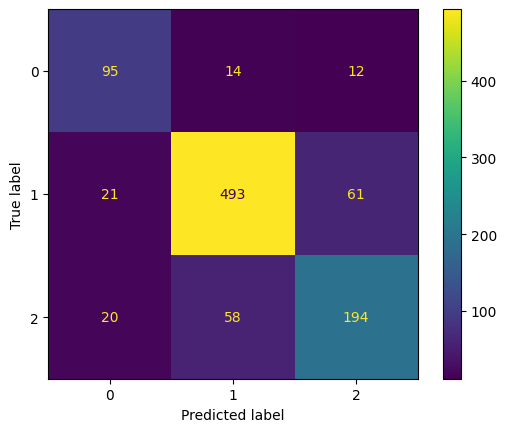

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       121
           1       0.87      0.86      0.86       575
           2       0.73      0.71      0.72       272

    accuracy                           0.81       968
   macro avg       0.77      0.79      0.77       968
weighted avg       0.81      0.81      0.81       968



In [44]:
validation_pred = model.predict({'input_ids': X_val['input_ids'], 'attention_mask': X_val['attention_mask']})
validation_pred = np.argmax(validation_pred,axis=1)
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(validation_df.sentiment,validation_pred)
plt.show()
print("Classification Report:")
print(classification_report(validation_df.sentiment,validation_pred))